In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
data = pd.read_csv("scrubbed.csv",sep=',')

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
datetime                80332 non-null object
city                    80332 non-null object
state                   74535 non-null object
country                 70662 non-null object
shape                   78400 non-null object
duration (seconds)      80332 non-null object
duration (hours/min)    80332 non-null object
comments                80317 non-null object
date posted             80332 non-null object
latitude                80332 non-null object
longitude               80332 non-null float64
dtypes: float64(1), object(10)
memory usage: 3.7+ MB


In [4]:
data.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [8]:
us_list = []
i=0
while len(us_list)<10000:
    if data['country'][i]=='us':
        us_list.append(i)
    i+=1

In [10]:
len(us_list)

10000

In [12]:
data_with_us = data.loc[us_list]

In [13]:
data_with_us.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333


In [15]:
data_with_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 12000
Data columns (total 11 columns):
datetime                10000 non-null object
city                    10000 non-null object
state                   10000 non-null object
country                 10000 non-null object
shape                   9774 non-null object
duration (seconds)      10000 non-null object
duration (hours/min)    10000 non-null object
comments                9999 non-null object
date posted             10000 non-null object
latitude                10000 non-null object
longitude               10000 non-null float64
dtypes: float64(1), object(10)
memory usage: 546.9+ KB


In [29]:
alcoholic = np.zeros(10000)

#in the united states about 30% of people drink alcohol.
#we have an observation with 10000 people, so we can think that 3000 of them are alcoholic
#choose randomly 3000 elements from the list and renumber them to the 1

import random

randomized = np.random.randint(0,10000,3000)
for i in randomized:
    alcoholic[i]=1
data_with_us['Alcoholic'] = alcoholic

In [32]:
#in the United States 90% have secondary education
# 40% of those who has a secondary education have a higher education
# 15% of people that get higher education get the PhD

secondary_education = np.zeros(10000)
higher_education = np.zeros(10000)
phd = np.zeros(10000)

random_sec = np.random.randint(0,10000,9000)
for i in random_sec:
    secondary_education[i] = 1
data_with_us['Secondary Education'] = secondary_education

random_high = random.choices(random_sec,k=3600)
for i in random_high:
    higher_education[i] = 1
data_with_us['Higher Education'] = higher_education

random_phd = random.choices(random_high,k=540)
for i in random_high:
    phd[i] = 1
data_with_us['PhD'] = phd

In [33]:
data_with_us.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Alcoholic,Secondary Education,Higher Education,PhD
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,0.0,0.0,0.0,0.0
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,1.0,1.0,1.0,1.0
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,0.0,0.0,0.0,0.0
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889,0.0,0.0,0.0,0.0
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333,0.0,1.0,0.0,0.0


In [40]:
dictionary_years = {'2000':0,'2004':0,'2012':0,'2014':0,'2006':0,'2009':0,'2001':0,'2008':0,'2003':0,
                   '1998':0,'2005':0,'1999':0,'2013':0,'2010':0,'2002':0,'2007':0,'2011':0}
month = {'1':0,'2':0,'3':0,'4':0,'5':0,'6':0,'7':0,'8':0,'9':0,'10':0,'11':0,'12':0}
years = []
for i in data_with_us['date posted']:
    m,d,y =  i.split('/')
    dictionary_years[y] = dictionary_years[y]+1
    month[m] = month[m]+1

[367, 544, 996, 179, 527, 736, 408, 525, 651, 155, 701, 750, 1036, 548, 497, 582, 798]


Text(0, 0.5, 'Number of observation')

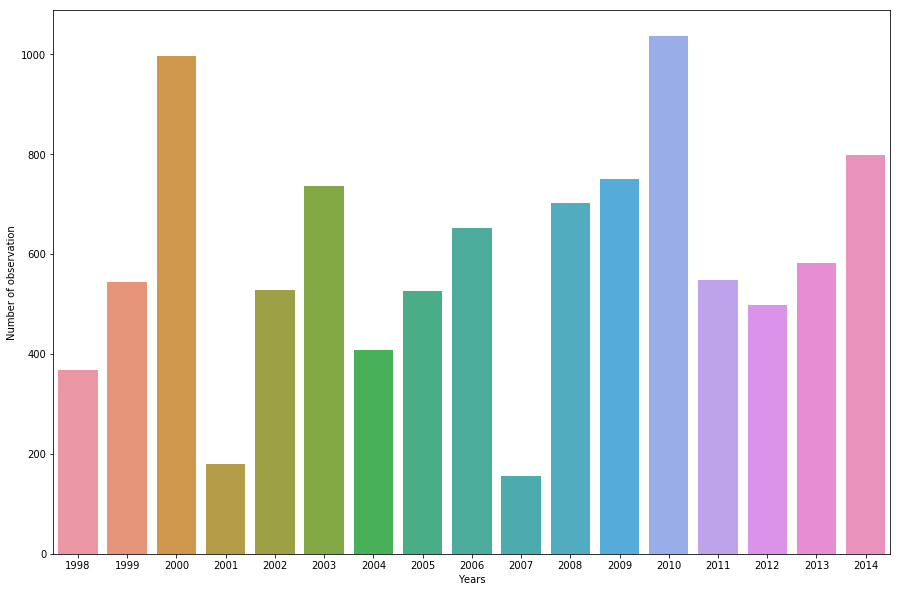

In [58]:
x = []
for key in dictionary_years:
    x.append(int(key))
x_ = sorted(x)
y_ = []
for i in x:
    y_.append(dictionary_years[str(i)])
plt.figure(figsize=(15,10))
sns.barplot(x=x_, y=y_)
plt.xlabel('Years')
plt.ylabel('Number of observation')

[1020, 509, 290, 199, 184, 133, 126, 203, 155, 2787, 2762, 1632]


Text(0, 0.5, 'Number of observation')

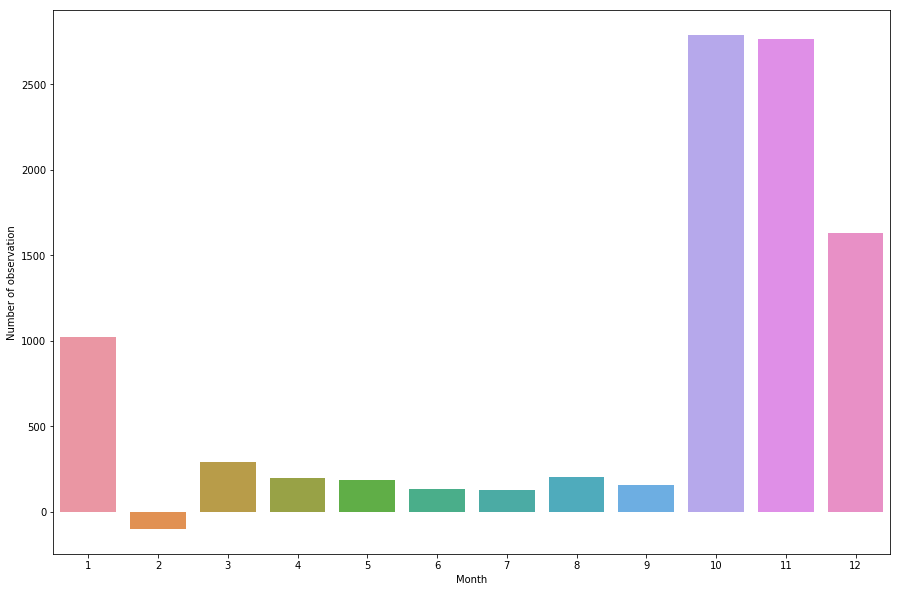

In [61]:
x = []
for key in month:
    x.append(int(key))
x_ = sorted(x)
y_ = []
for i in x:
    y_.append(month[str(i)])
plt.figure(figsize=(15,10))
sns.barplot(x=x_, y=y_)
plt.xlabel('Month')
plt.ylabel('Number of observation')

In [84]:
x = list(set(data['shape']))

In [86]:
def update_lists(i,name,x,y_alc,y_not_alc,y_sec,y_not_sec,y_high,y_not_high,y_phd,y_not_phd):
    number = x.index(name)
    
    if list(data_with_us['Alcoholic'])[i] == 1:
        y_alc[number] += 1
    else:
        y_not_alc[number] -= 1
        
    if list(data_with_us['Secondary Education'])[i] == 1:
        y_sec[number] += 1
    else:
        y_not_sec[number] -= 1
        
    if list(data_with_us['Higher Education'])[i] == 1:
        y_high[number] += 1
    else:
        y_not_high[number] -= 1
        
    if list(data_with_us['PhD'])[i] == 1:
        y_phd[number] += 1
    else:
        y_not_phd[number] -= 1
    
    return y_alc,y_not_alc,y_sec,y_not_sec,y_high,y_not_high,y_phd,y_not_phd

In [88]:
y_alc = np.zeros(30)
y_not_alc = np.zeros(30)
y_sec = np.zeros(30)
y_not_sec = np.zeros(30)
y_high = np.zeros(30)
y_not_high = np.zeros(30)
y_phd = np.zeros(30)
y_not_phd = np.zeros(30)

for i in range(10000):
    y_alc,y_not_alc,y_sec,y_not_sec,y_high,y_not_high,y_phd,y_not_phd = update_lists(i,list(data_with_us['shape'])[i],x,
                                                                                    y_alc,y_not_alc,y_sec,y_not_sec,
                                                                                    y_high,y_not_high,y_phd,y_not_phd)

Text(0.5, 0, 'Shape')

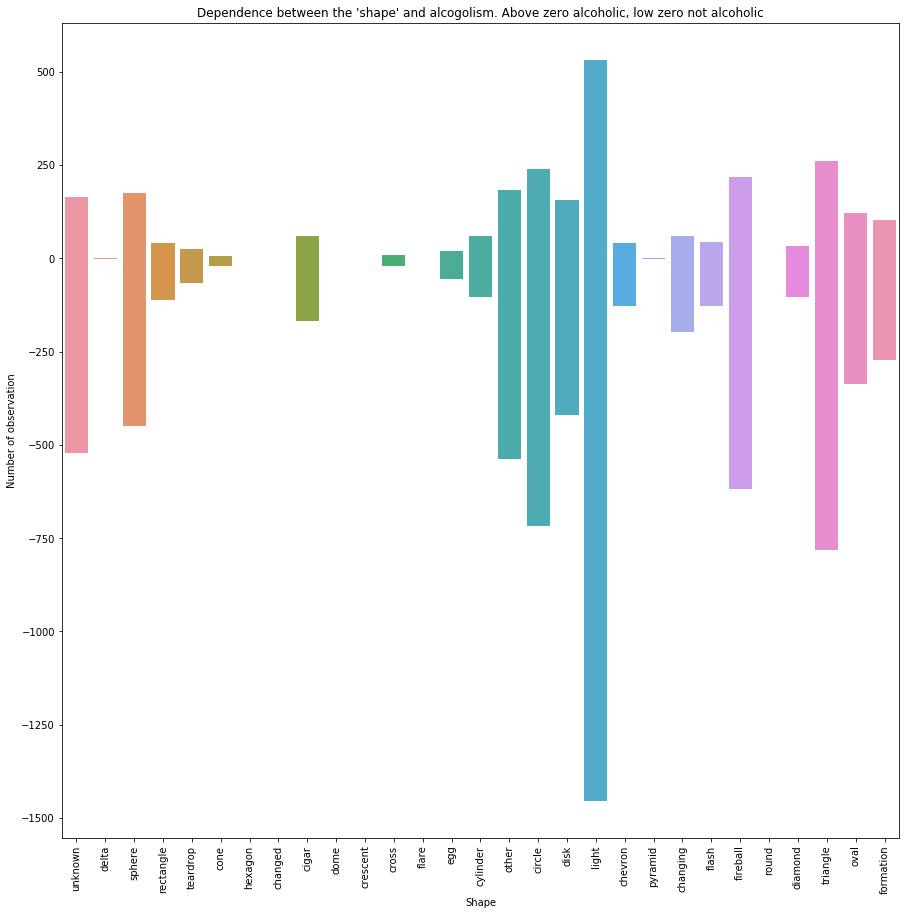

In [100]:
plt.figure(figsize=(15,15))
plt.title("Dependence between the 'shape' and alcogolism. Above zero alcoholic, low zero not alcoholic")
sns.barplot(x=x, y=y_alc)
sns.barplot(x=x, y=y_not_alc)
plt.xticks(rotation= 90)
plt.ylabel('Number of observation')
plt.xlabel('Shape')


Text(0.5, 0, 'Shape')

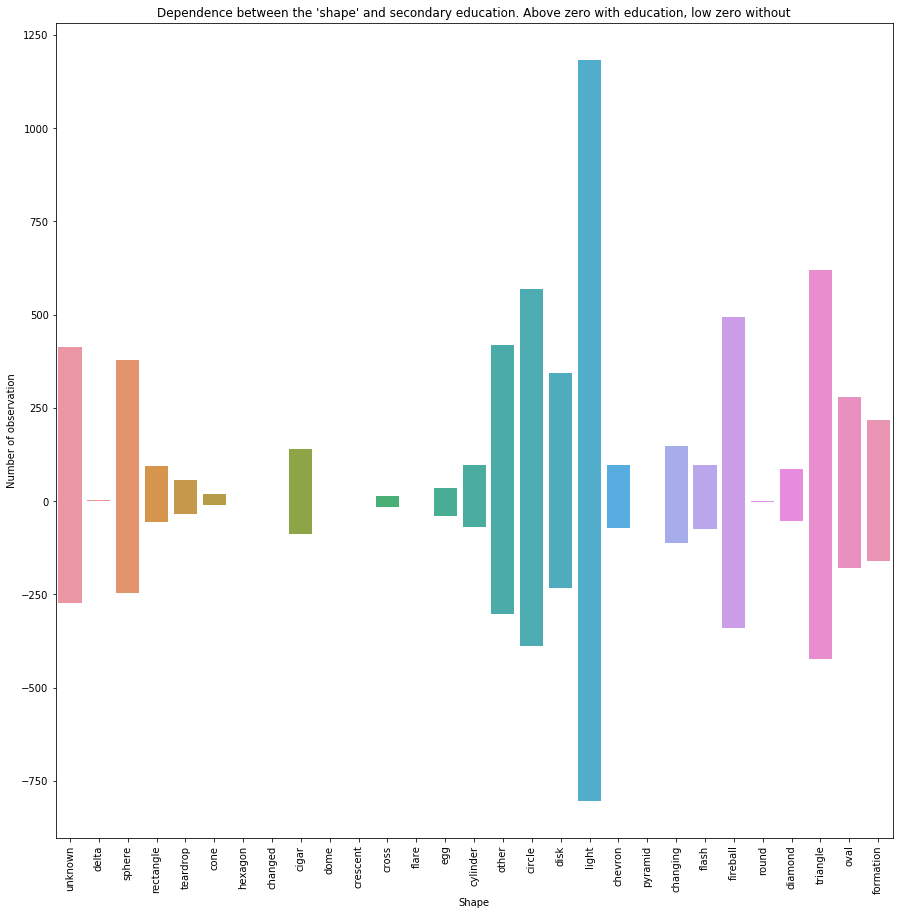

In [101]:
plt.figure(figsize=(15,15))
plt.title("Dependence between the 'shape' and secondary education. Above zero with education, low zero without")
sns.barplot(x=x, y=y_sec)
sns.barplot(x=x, y=y_not_sec)
plt.xticks(rotation= 90)
plt.ylabel('Number of observation')
plt.xlabel('Shape')

Text(0.5, 0, 'Shape')

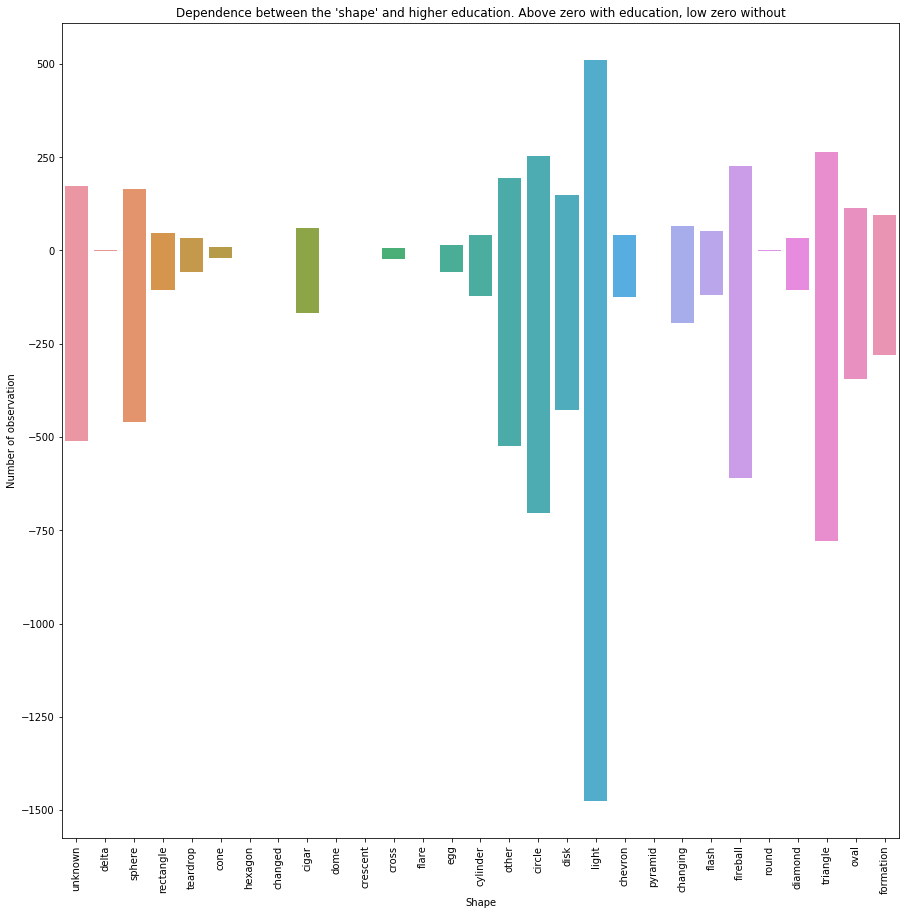

In [103]:
plt.figure(figsize=(15,15))
plt.title("Dependence between the 'shape' and higher education. Above zero with education, low zero without")
sns.barplot(x=x, y=y_high)
sns.barplot(x=x, y=y_not_high)
plt.xticks(rotation= 90)
plt.ylabel('Number of observation')
plt.xlabel('Shape')

Text(0.5, 0, 'Shape')

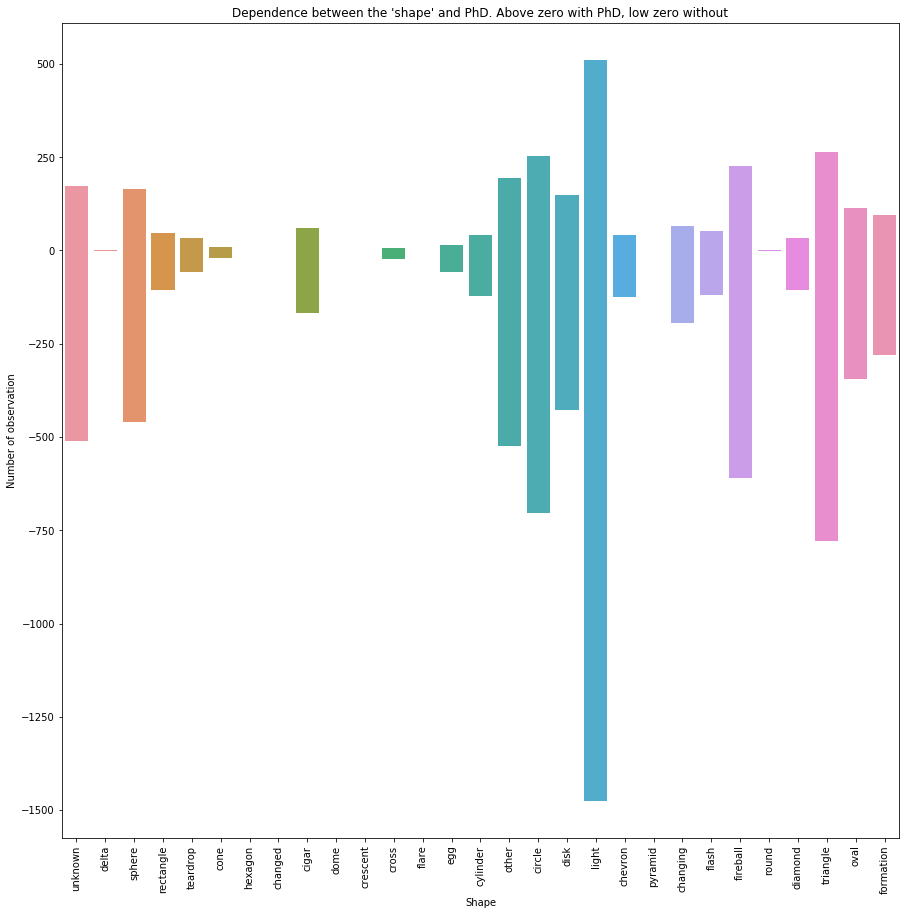

In [104]:
plt.figure(figsize=(15,15))
plt.title("Dependence between the 'shape' and PhD. Above zero with PhD, low zero without")
sns.barplot(x=x, y=y_phd)
sns.barplot(x=x, y=y_not_phd)
plt.xticks(rotation= 90)
plt.ylabel('Number of observation')
plt.xlabel('Shape')

In [106]:
data_with_us.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,Alcoholic,Secondary Education,Higher Education,PhD
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,0.0,0.0,0.0,0.0
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,1.0,1.0,1.0,1.0
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,0.0,0.0,0.0,0.0
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889,0.0,0.0,0.0,0.0
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333,0.0,1.0,0.0,0.0


In [110]:
data['datetime'][i].split()

['11/16/2011', '04:09']

In [148]:
def alc_or_not(i):
    is_alc = False
    if list(data_with_us['Alcoholic'])[i] == 1:
        is_alc = True
    return is_alc

In [149]:
def update_time(time,time_list,time_list_,i):
    if time>'00.00' and time<='01.00':
        if alc_or_not(i):
            time_list[0] +=1
        else:
            time_list_[0] -=1
    elif time > '01.00' and time <= '02.00':
        if alc_or_not(i):
            time_list[1] +=1
        else:
            time_list_[1] -=1
    elif time > '02.00' and time <= '03.00':
        if alc_or_not(i):
            time_list[2] +=1
        else:
            time_list_[2] -=1
    elif time > '03.00' and time <= '04.00':
        if alc_or_not(i):
            time_list[3] +=1
        else:
            time_list_[3] -=1
    elif time > '04.00' and time <= '05.00':
        if alc_or_not(i):
            time_list[4] +=1
        else:
            time_list_[4] -=1
    elif time > '05.00' and time <= '06.00':
        if alc_or_not(i):
            time_list[5] +=1
        else:
            time_list_[5] -=1
    elif time > '06.00' and time <= '07.00':
        if alc_or_not(i):
            time_list[6] +=1
        else:
            time_list_[6] -=1
    elif time > '07.00' and time <= '08.00':
        if alc_or_not(i):
            time_list[7] +=1
        else:
            time_list_[7] -=1
    elif time > '08.00' and time <= '09.00':
        if alc_or_not(i):
            time_list[8] +=1
        else:
            time_list_[8] -=1
    elif time > '10.00' and time <= '11.00':
        if alc_or_not(i):
            time_list[9] +=1
        else:
            time_list_[9] -=1
    elif time > '11.00' and time <= '12.00':
        if alc_or_not(i):
            time_list[10] +=1
        else:
            time_list_[10] -=1
    elif time > '12.00' and time <= '13.00':
        if alc_or_not(i):
            time_list[11] +=1
        else:
            time_list_[11] -=1
    elif time > '13.00' and time <= '14.00':
        if alc_or_not(i):
            time_list[12] +=1
        else:
            time_list_[12] -=1
    elif time > '14.00' and time <= '15.00':
        if alc_or_not(i):
            time_list[13] +=1
        else:
            time_list_[13] -=1
    elif time > '15.00' and time <= '16.00':
        if alc_or_not(i):
            time_list[14] +=1
        else:
            time_list_[14] -=1
    elif time > '16.00' and time <= '17.00':
        if alc_or_not(i):
            time_list[15] +=1
        else:
            time_list_[15] -=1
    elif time > '17.00' and time <= '18.00':
        if alc_or_not(i):
            time_list[16] +=1
        else:
            time_list_[16] -=1
    elif time > '18.00' and time <= '19.00':
        if alc_or_not(i):
            time_list[17] +=1
        else:
            time_list_[17] -=1
    elif time > '19.00' and time <= '20.00':
        if alc_or_not(i):
            time_list[18] +=1
        else:
            time_list_[18] -=1
    elif time > '21.00' and time <= '22.00':
        if alc_or_not(i):
            time_list[19] +=1
        else:
            time_list_[19] -=1
    elif time > '22.00' and time <= '23.00':
        if alc_or_not(i):
            time_list[20] +=1
        else:
            time_list_[20] -=1
    elif time > '23.00' and time <= '00.00':
        if alc_or_not(i):
            time_list[21] +=1
        else:
            time_list_[21] -=11
    else:
        pass
    return time_list,time_list_

In [150]:
alc_times = np.zeros(21)
alc_times_ = np.zeros(21)
for i in range(10000):
    alc_times, alc_times_ = update_time(list(data_with_us['datetime'])[i].split()[1],alc_times,alc_times_,i)

Text(0.5, 0, 'Hours')

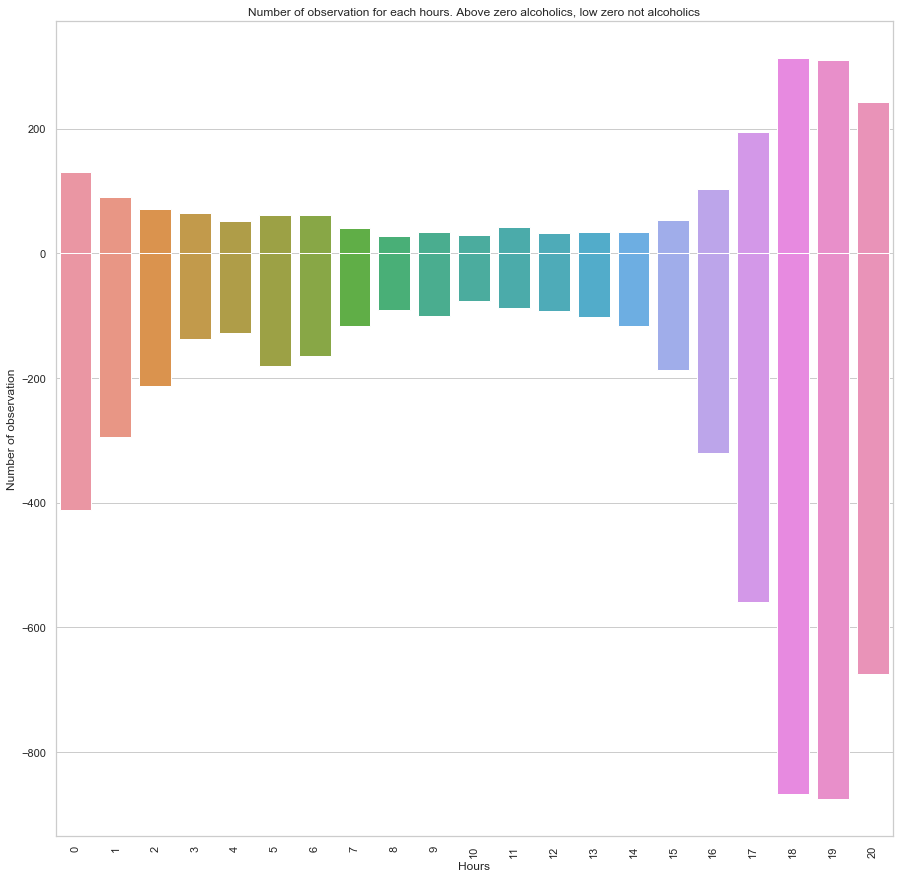

In [152]:
plt.figure(figsize=(15,15))
plt.title("Number of observation for each hours. Above zero alcoholics, low zero not alcoholics")
sns.set(style="whitegrid")
sns.barplot(x=x,y=alc_times)
sns.barplot(x=x,y=alc_times_)
plt.xticks(rotation= 90)
plt.ylabel('Number of observation')
plt.xlabel('Hours')